<a href="https://colab.research.google.com/github/SaintNickG/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales_Part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

* Author- Nicholas Giuffrida




## Project Overview

## Load and Inspect Data

In [1]:
# Import pandas
import pandas as pd
# Import Numpy
import numpy as np
# Save file path for sales predictions
fname = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
# Save Sales as a dataframe
sales = pd.read_csv(fname)

In [2]:
sales_2 = sales.copy()

In [3]:
# Inpsect the data head
sales.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [4]:
# Inspect the data summary
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


> To confirm that the range index is truly 8523 entries, I will also check the last 3 entries, using the .tail() function


In [5]:
# Inspect the data tail
sales.tail(3)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
8520           NCJ29        10.60          Low Fat         0.035186   
8521           FDN46         7.21          Regular         0.145221   
8522           DRG01        14.80          Low Fat         0.044878   

               Item_Type  Item_MRP Outlet_Identifier  \
8520  Health and Hygiene   85.1224            OUT035   
8521         Snack Foods  103.1332            OUT018   
8522         Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700

## Clean Data (Exploratory)



*   How many rows and columns?





In [6]:
sales.shape

(8523, 12)



*   There are 8,523 rows, and 12 columns





In [7]:
# Check the data types
sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object




*   What are the datatypes of each variable?
**   There are objects, floats, and integer data types  



In [8]:
sales.head(2)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDA15         9.30          Low Fat         0.016047        Dairy   
1           DRC01         5.92          Regular         0.019278  Soft Drinks   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   
1   48.2692            OUT018                       2009      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               Tier 1  Supermarket Type1          3735.1380  
1               Tier 3  Supermarket Type2           443.4228



*   There are no Unnamed: 0 columns
*   All data types are correct



## Check for duplicate data

*   Are there duplicates? If so, drop any duplicates.



In [9]:
from pandas._libs.hashtable import duplicated
sales.duplicated().sum()

0



*   There are no duplicated rows of data



## Check for missing data

*   Identify missing values.



In [10]:
sales.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Find the percenteges of missing values



In [11]:
sales.isna().sum() / len(sales) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64



*   There are 1,463 missing values from Item Weight (17.16%)
*   There are 2,410 missing values from Outle Size (28.28%)



In [12]:
null_sums = sales.isna().sum()
null_sums

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
null_percent = null_sums/len(sales) * 100
null_percent

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [14]:
from pandas.core.groupby.groupby import nullcontext
# Limit view to only columns with missing values
null_percent[null_percent>0]

Item_Weight    17.165317
Outlet_Size    28.276428
dtype: float64



*   Address the missing values by using a placeholder value.



In [15]:
sales['Item_Weight'] = sales['Item_Weight'].fillna(-1)



*   Again, address the missing values by using a placeholder value



In [16]:
sales['Outlet_Size'] = sales['Outlet_Size'].fillna("MISSING")





**Confirm that all missing values have been addressed**







In [17]:
sales.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

##  Find and fix any inconsistent categories of data

In [18]:
# Make a filter to view all remaining string columns
string_cols = sales.select_dtypes("object").columns
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [19]:
# View the Value Counts of string columns
for col in string_cols:
  print(f'Value Counts for{col}')
  print(sales[col].value_counts())
  # Add a space to make reading easier
  print('\n')

Value Counts forItem_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts forItem_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts forItem_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts forOutlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT0



*   Here we see that the Item Fat Content column has three different values to describe Low Fat, and two different values to describe Regular
** We will address this inconsistancy here



In [20]:
sales['Item_Fat_Content'] = sales['Item_Fat_Content'].replace({'LF':"Low Fat", 'low fat':"Low Fat", 'reg':"Regular"})
sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64



*   For any numerical columns, obtain the summary statistics of each (min, max, mean).

In [21]:
num_cols = sales.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [22]:
sales.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  8523.000000      8523.000000  8523.000000                8523.000000   
mean     10.478936         0.066132   140.992782                1997.831867   
std       6.720742         0.051598    62.275067                   8.371760   
min      -1.000000         0.000000    31.290000                1985.000000   
25%       6.650000         0.026989    93.826500                1987.000000   
50%      11.000000         0.053931   143.012800                1999.000000   
75%      16.000000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [23]:
# Create a dictionary to rename the columns
rename_dict = {"Item_Identifier":"Product ID", "Item_Weight":"Weight", "Item_Fat_Content":"Fat Content",
               "Item_Visibility":"Visibility Percentage",
               "Item_Type":"Product Category",
               "Item_MRP":"List Price",
               "Outlet_Identifier":"Store ID",
               "Outlet_Establishment_Year":"Store Established Year",
               "Outlet_Size":"Store Size",
               "Outlet_Location_Type":"Store Location Type",
               "Outlet_Type":"Store Type",
               "Item_Outlet_Sales":"Total Sales by Outlet"}

In [24]:
# Use The rename dictionary to rename the columns
sales = sales.rename(rename_dict,axis=1)
sales.head()

Product ID  Weight Fat Content  Visibility Percentage  \
0      FDA15    9.30     Low Fat               0.016047   
1      DRC01    5.92     Regular               0.019278   
2      FDN15   17.50     Low Fat               0.016760   
3      FDX07   19.20     Regular               0.000000   
4      NCD19    8.93     Low Fat               0.000000   

        Product Category  List Price Store ID  Store Established Year  \
0                  Dairy    249.8092   OUT049                    1999   
1            Soft Drinks     48.2692   OUT018                    2009   
2                   Meat    141.6180   OUT049                    1999   
3  Fruits and Vegetables    182.0950   OUT010                    1998   
4              Household     53.8614   OUT013                    1987   

  Store Size Store Location Type         Store Type  Total Sales by Outlet  
0     Medium              Tier 1  Supermarket Type1              3735.1380  
1     Medium              Tier 3  Supermarket Type2               443.4228  
2     Medium              Tier 1  Supermarket Type1              2097.2700  
3    MISSING              Tier 3      Grocery Store               732.3800  
4       High              Tier 3  Supermarket Type1               994.7052

## Exploratory Data Analysis

> We will create exploratory visuals to help understand our Data

*   Histograms will help us view the distribution of our data's numerical features

*   Boxplots will be used to view statistical summaries of our numerical features
*   Countplots will be used to view the frequncy of each class of categorical features in our date set

 in our data







> **First we need to import 2 more libraries**





In [25]:
# Import Matplot and seaborn
import matplotlib.pyplot as plt
import seaborn as sns



> I will also set seaborn styles to maintain consistant format

*   This is similar to the style used by Sherlin Whaley in the example project






In [26]:
# set the style for seaborn
plt.style.use(['dark_background','seaborn-v0_8-muted', 'seaborn-v0_8-poster'])



> We will start this phase by using histograms to view the distribution of data within our numerical features one at a time


- We will use a histogram to view our item distribution by weight



In [27]:
ax = sns.histplot(data = sales, x = "Weight", color = 'Magenta')



> **Apart from the -1 values, which represent our placeholder value, we see a fairly even distribution of our values by weight**



-  We will look at Visibility Percentage as a histogram

In [28]:
ax = sns.histplot(data = sales, x = "Visibility Percentage")



> **This chart demonstrates a negative correlation between total count and Visibility Percentage**



-  Let's see the distribution of values for List Price

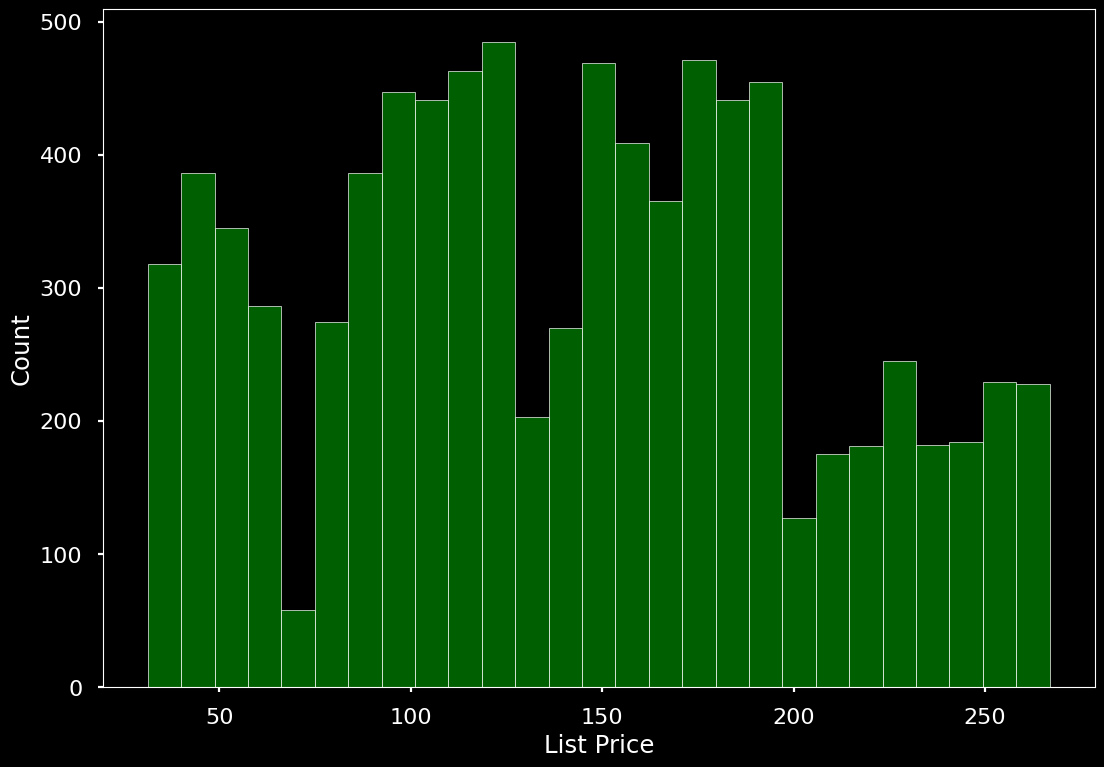

In [29]:
ax = sns.histplot(data = sales, x = "List Price", color = 'Green')




> **This distribution is more random, but seams to peak near the median**



-  We will make a histogram of the Store Established Year column

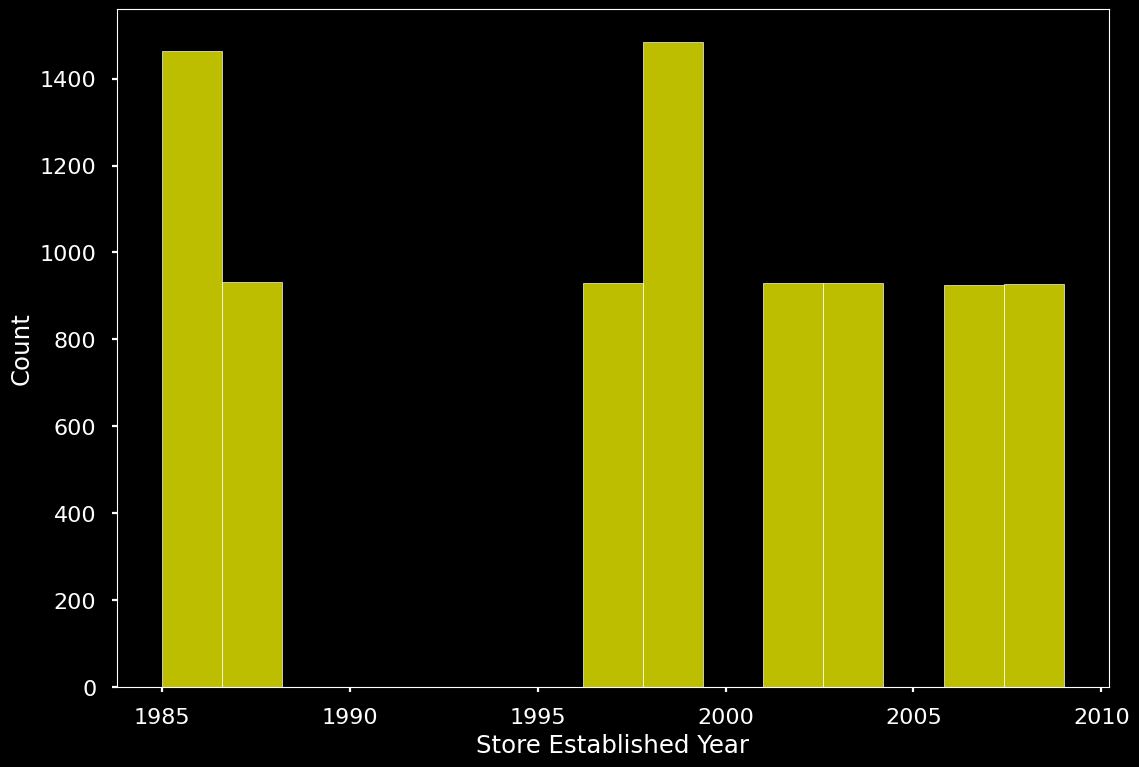

In [30]:
ax = sns.histplot(data = sales, x = "Store Established Year", color = 'Yellow')



> **The large gaps represent years where no stores were established within our data set**



-  And a histogram for Total Sales by Outlet

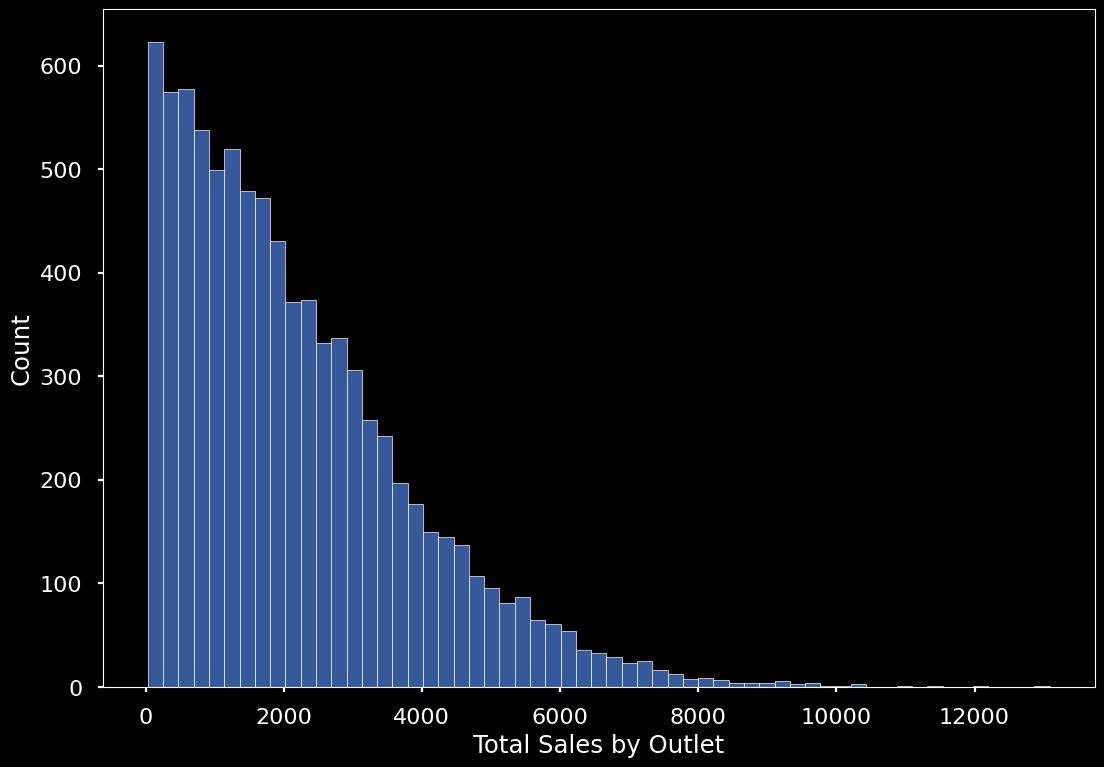

In [31]:
ax = sns.histplot(data = sales, x = "Total Sales by Outlet")



> **Again, similar to Item Visibility, we see negative correlation, but here the correlation is even stronger.**





> Next we will create a boxplot for each numerical feature.

-This will help us to visualize statistical summaries for these cloumns


-  A boxplot for weight





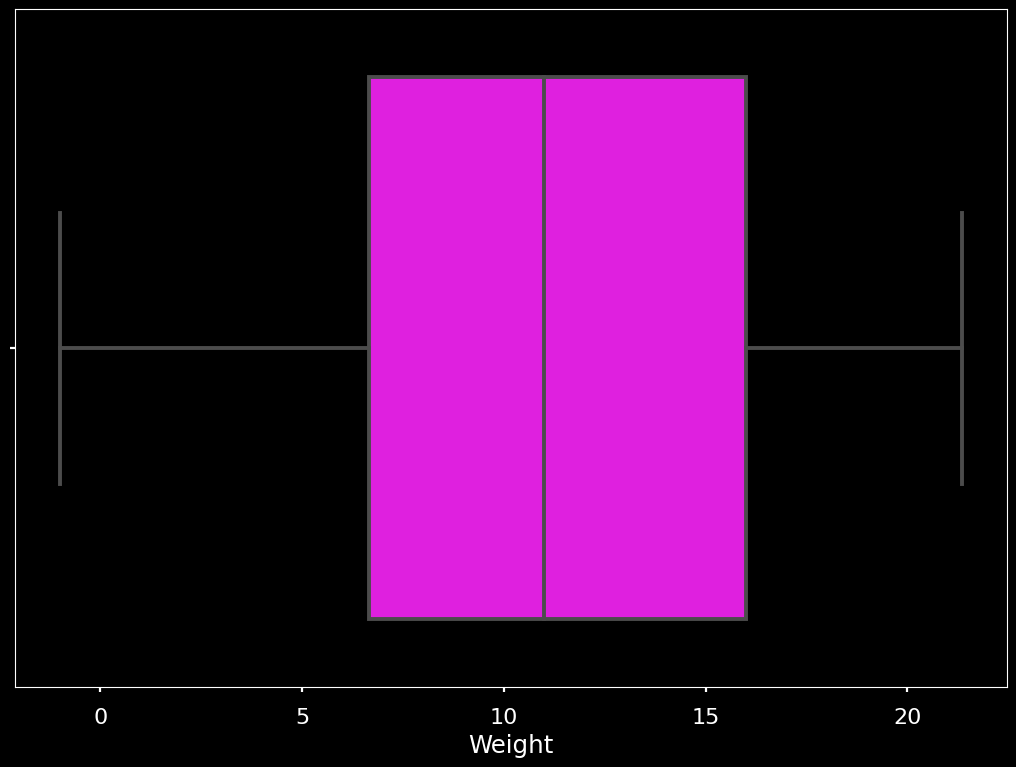

In [32]:
ax = sns.boxplot(data = sales, x = 'Weight', color = 'Magenta')



> **Similar to the histogram for Weight, the boxplot shows a fairly even distribution of values**



-  We will make a boxplot for Visibility percentage, where we would expect to see many more values outside of Q2 and Q3

In [33]:
ax = sns.boxplot(data = sales, y = 'Visibility Percentage')





> **As expected we see many outliers, we may later want to compare this column to Total Sales by Outlet to check for correlation**







-  A Boxplot for List Price



In [34]:
ax = sns.boxplot(data = sales, x = 'List Price', color = "Green")



> **We see again that when the data points are scattered more randomly through the range, the boxplot has little to divulge other than in Q2 and Q3**



-  We make a boxplot for the Store Established Year
 *  It is likely some of these columns will be less useful than others when it comes to explanatory data





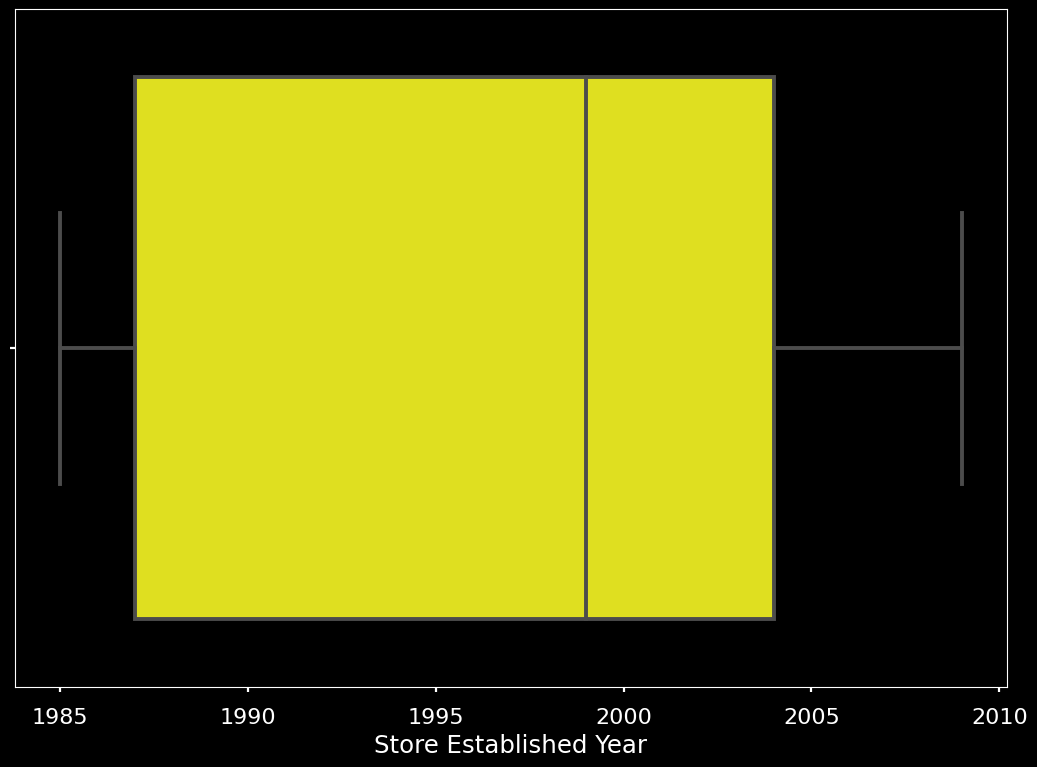

In [35]:
ax= sns.boxplot(data = sales, x = 'Store Established Year', color = 'Yellow')

>  **We can see that most of the data points are concentrated in Q2 of this plot**

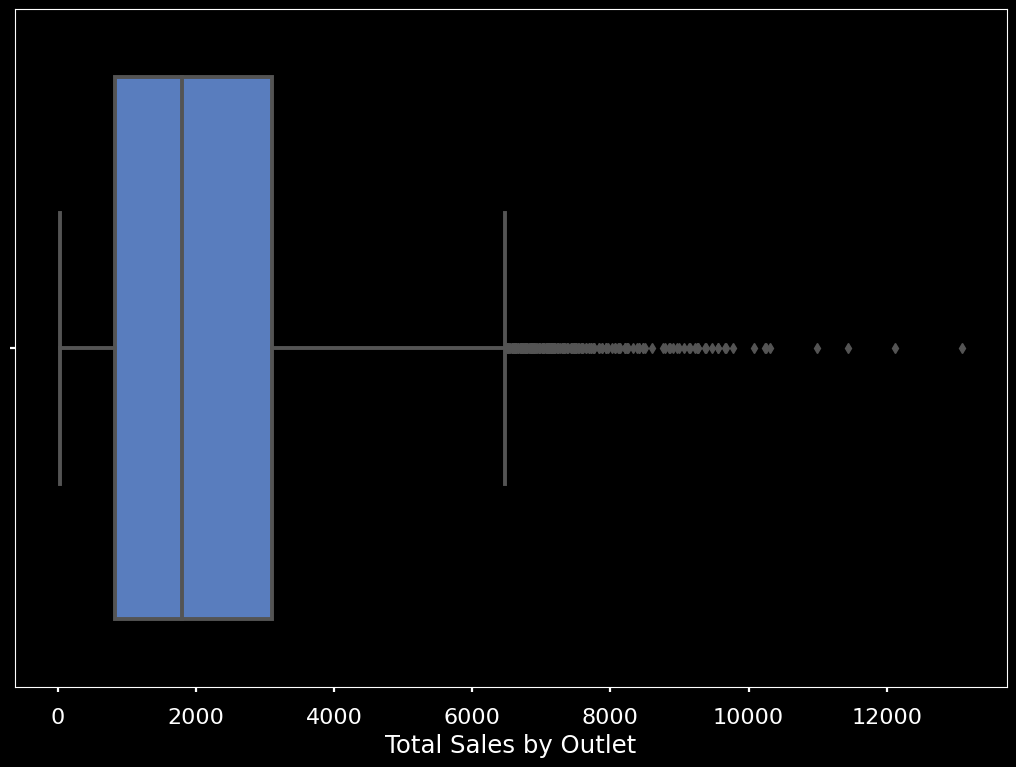

In [36]:
ax = sns.boxplot(data = sales, x = 'Total Sales by Outlet')

*  I will make a regression plot to investigate correlation between Total Sales by Outlet and Visibility Percentage

In [37]:
line_kws = dict(color='White')
ax = sns.regplot(data = sales, y = "Total Sales by Outlet", x = 'Visibility Percentage',
line_kws = line_kws)

>  **Though week, there is a negative correlation between these two values**

 -  This is counterintuitive data, but reinforces the concept that correlation does not equal causation

>  We will use countplots to view categorical Data columns
 -  We can skip columns that are made up of mostly unique identifiers

- We will make a countplot for Fat Content

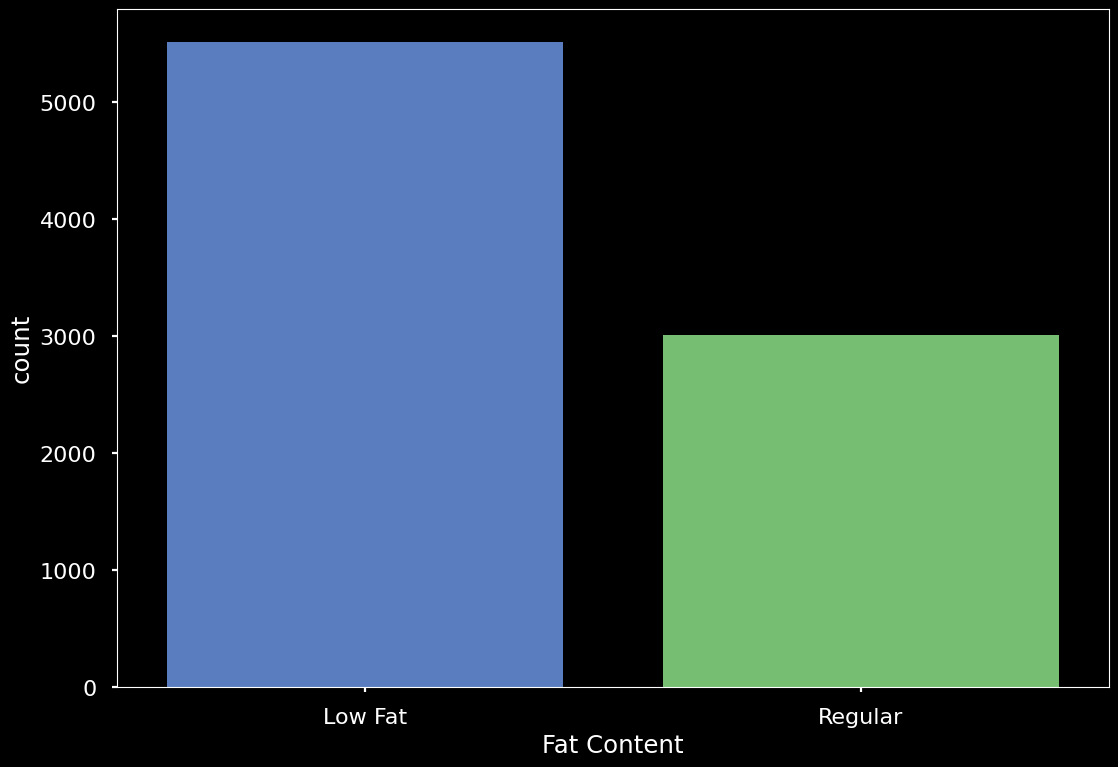

In [38]:
ax = sns.countplot(data = sales, x = 'Fat Content')

>  **In this chart we can see that nearly twice as many values are in the Low Fat category as Regular**

-  Next a countplot for Product Category
 -  This can be enhanced by adding Fat content as the "hue" arguement

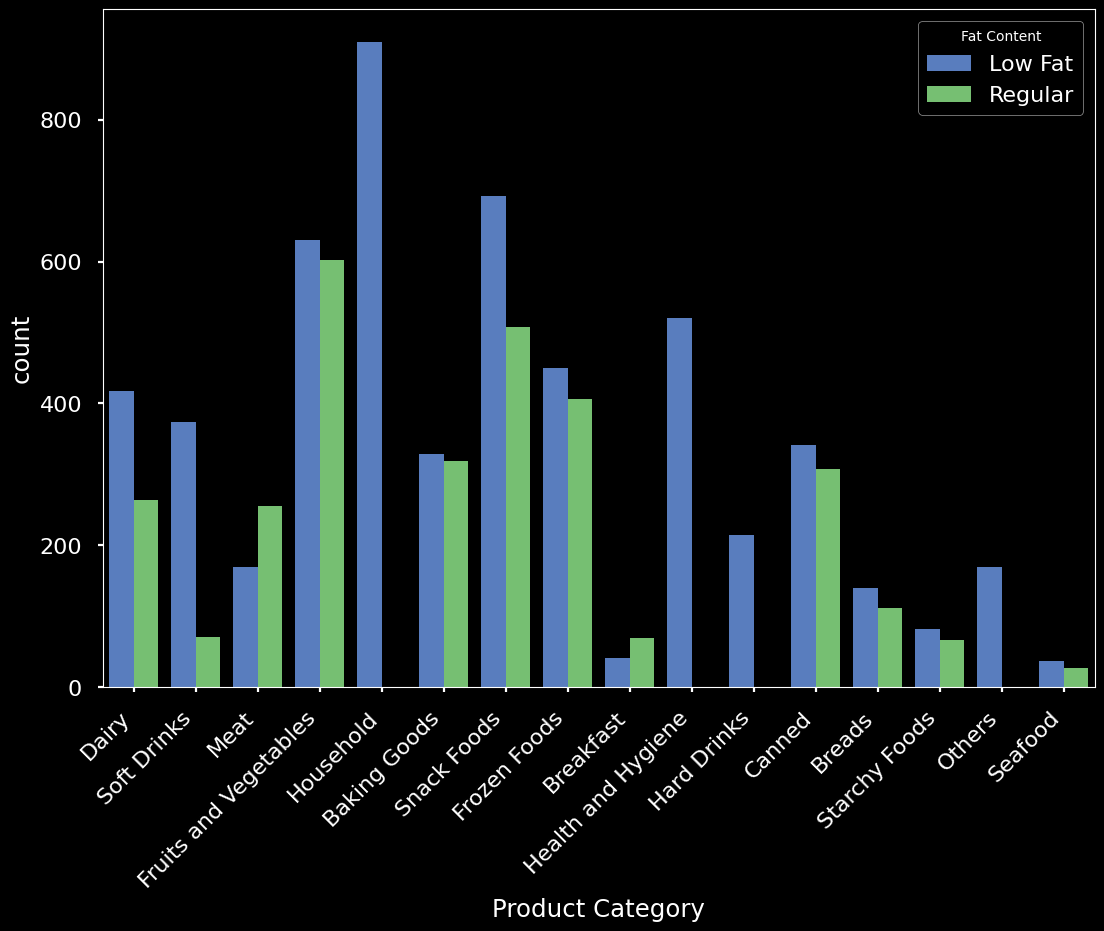

In [39]:
ax = sns.countplot(data = sales, x = 'Product Category', hue = "Fat Content")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

>  **We can see that some some values are not represented by a green line, quickly scanning the name of the column tells us why.**
 *  They appear to be non-food items

####  We can now make a heatmap to show correlation between the numeric features of or Data
*  We will begin by creating a variable called "corr"

In [40]:
# Make a variable for correlations
corr = sales.corr(numeric_only = True)
corr.round(2)

Weight  Visibility Percentage  List Price  \
Weight                    1.00                  -0.08        0.02   
Visibility Percentage    -0.08                   1.00       -0.00   
List Price                0.02                  -0.00        1.00   
Store Established Year    0.54                  -0.07        0.01   
Total Sales by Outlet    -0.06                  -0.13        0.57   

                        Store Established Year  Total Sales by Outlet  
Weight                                    0.54                  -0.06  
Visibility Percentage                    -0.07                  -0.13  
List Price                                0.01                   0.57  
Store Established Year                    1.00                  -0.05  
Total Sales by Outlet                    -0.05                   1.00

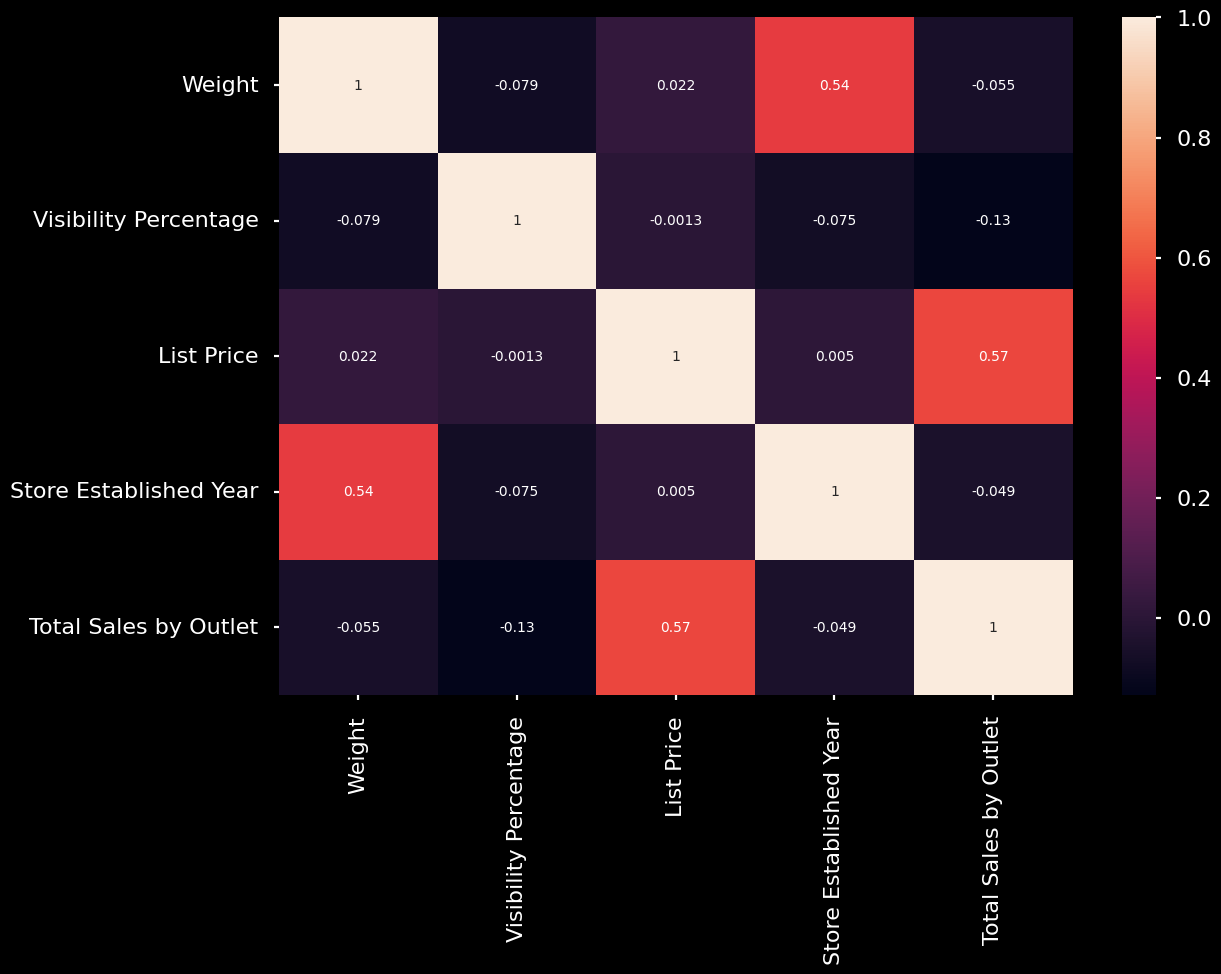

In [41]:
# Use seaborn to make a heatmap of these correlations
sns.heatmap(corr, annot = True);

>  **This graph shows moderate correlation between "List Price" and "Total Sales by Outlet**

-This fact seems *incidental*
>  **The graph also shows moderate positive correlation between "Store Established Year" and "Weight"**

-This fact appears on the surface more *coincidental*

##  Explanatory Data Analysis (EDA)

-  We will create visualiztions to demonstrate the relationships between different variables mostly as they relate to *Total Sales by Outlet*.



   -  I will create a copy of the Data Frame.
    - df_sales will allow us to keep the data we have created to this point
    

In [42]:
# Save file path for sales predictions
fname = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
# Save df_sales as a dataframe
df_sales = pd.read_csv(fname)

In [43]:
df_sales.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

###  Remove the placeholder values
- The placholder values that we imputed for our *Exploratory Analysis*, will not be used.  
 -  As I clean the data, this time I will not remove the null values
 - Otherwise I will repeat the process from the section "Data Cleaning (Exploratory)".

## Clean Data (Explanatory)
- We recall that Item Fat Content column has three different values to describe Low Fat, and two different values to describe Regular
- We will address this inconsistancy here.

In [44]:
# Replace the inconsistancies in the item fat content column with the correct dictionary
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace({'LF':"Low Fat", 'low fat':"Low Fat", 'reg':"Regular"})
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [45]:
# Use The rename dictionary to rename the columns
df_sales = df_sales.rename(rename_dict,axis=1)
df_sales.head()

Product ID  Weight Fat Content  Visibility Percentage  \
0      FDA15    9.30     Low Fat               0.016047   
1      DRC01    5.92     Regular               0.019278   
2      FDN15   17.50     Low Fat               0.016760   
3      FDX07   19.20     Regular               0.000000   
4      NCD19    8.93     Low Fat               0.000000   

        Product Category  List Price Store ID  Store Established Year  \
0                  Dairy    249.8092   OUT049                    1999   
1            Soft Drinks     48.2692   OUT018                    2009   
2                   Meat    141.6180   OUT049                    1999   
3  Fruits and Vegetables    182.0950   OUT010                    1998   
4              Household     53.8614   OUT013                    1987   

  Store Size Store Location Type         Store Type  Total Sales by Outlet  
0     Medium              Tier 1  Supermarket Type1              3735.1380  
1     Medium              Tier 3  Supermarket Type2               443.4228  
2     Medium              Tier 1  Supermarket Type1              2097.2700  
3        NaN              Tier 3      Grocery Store               732.3800  
4       High              Tier 3  Supermarket Type1               994.7052

In [46]:
# check for missing values
df_sales.isna().sum()

Product ID                   0
Weight                    1463
Fat Content                  0
Visibility Percentage        0
Product Category             0
List Price                   0
Store ID                     0
Store Established Year       0
Store Size                2410
Store Location Type          0
Store Type                   0
Total Sales by Outlet        0
dtype: int64

In [47]:
# Verify that there are no duplicated rows
df_sales.duplicated().sum()

0

###  Check for extreme values
-  We will create a filter to check for extreme values.
-  We will address any extreme values as necessary.

In [48]:
# Filter the dataframe to expose extreme values
description = df_sales.describe().round(2)
description.loc[['min','25%','75%','max']]

Weight  Visibility Percentage  List Price  Store Established Year  \
min    4.56                   0.00       31.29                  1985.0   
25%    8.77                   0.03       93.83                  1987.0   
75%   16.85                   0.09      185.64                  2004.0   
max   21.35                   0.33      266.89                  2009.0   

     Total Sales by Outlet  
min                  33.29  
25%                 834.25  
75%                3101.30  
max               13086.96

- **We notice that the max value for Total Sales by Outlet, is more than 4X the 75% value.**
 -  We will need to explore the high values to determine a course of action (if any).

In [49]:
filter_high_sales = df_sales['Total Sales by Outlet'] >= 9_000
df_sales[filter_high_sales]

Product ID  Weight Fat Content  Visibility Percentage  \
333       FDN58     NaN     Regular               0.056597   
456       FDS26     NaN     Low Fat               0.089036   
991       FDS44     NaN     Regular               0.155288   
997       FDK28   5.695     Low Fat               0.065961   
1009      FDU14     NaN     Low Fat               0.034584   
1450      FDZ20     NaN     Low Fat               0.000000   
2109      FDU55     NaN     Low Fat               0.035737   
3098      FDY02     NaN     Regular               0.087221   
4289      NCM05   6.825     Low Fat               0.059847   
4346      FDY55     NaN     Low Fat               0.000000   
4349      FDP33     NaN     Low Fat               0.088840   
4888      FDF39  14.850     Regular               0.019495   
4961      FDK03  12.600     Regular               0.074339   
5223      FDQ19     NaN     Regular               0.014296   
5500      FDG32     NaN     Low Fat               0.175143   
6409      FDA21  13.650     Low Fat               0.035931   
6541      FDI50     NaN     Regular               0.030693   
6606      DRF36     NaN     Low Fat               0.023463   
7188      NCE42     NaN     Low Fat               0.010551   
7191      NCH18     NaN     Low Fat               0.044445   
7752      FDC17     NaN     Low Fat               0.015386   
7930      FDP15     NaN     Low Fat               0.083536   
8201      FDO03     NaN     Regular               0.036704   

           Product Category  List Price Store ID  Store Established Year  \
333             Snack Foods    230.9984   OUT027                    1985   
456                   Dairy    260.5594   OUT027                    1985   
991   Fruits and Vegetables    241.7538   OUT027                    1985   
997            Frozen Foods    259.2646   OUT017                    2007   
1009                  Dairy    248.3750   OUT027                    1985   
1450  Fruits and Vegetables    253.0356   OUT027                    1985   
2109  Fruits and Vegetables    260.6278   OUT027                    1985   
3098                  Dairy    263.9910   OUT027                    1985   
4289     Health and Hygiene    262.5226   OUT046                    1997   
4346  Fruits and Vegetables    255.7988   OUT027                    1985   
4349            Snack Foods    254.2672   OUT027                    1985   
4888                  Dairy    261.2910   OUT013                    1987   
4961                  Dairy    255.5356   OUT017                    2007   
5223  Fruits and Vegetables    242.6512   OUT027                    1985   
5500  Fruits and Vegetables    222.3772   OUT027                    1985   
6409            Snack Foods    184.4924   OUT013                    1987   
6541                 Canned    228.0352   OUT027                    1985   
6606            Soft Drinks    190.6846   OUT027                    1985   
7188              Household    234.9958   OUT027                    1985   
7191              Household    245.2802   OUT027                    1985   
7752           Frozen Foods    208.9928   OUT027                    1985   
7930                   Meat    255.4330   OUT027                    1985   
8201                   Meat    228.1352   OUT027                    1985   

     Store Size Store Location Type         Store Type  Total Sales by Outlet  
333      Medium              Tier 3  Supermarket Type3              9267.9360  
456      Medium              Tier 3  Supermarket Type3              9158.0790  
991      Medium              Tier 3  Supermarket Type3              9133.4444  
997         NaN              Tier 2  Supermarket Type1              9275.9256  
1009     Medium              Tier 3  Supermarket Type3             10236.6750  
1450     Medium              Tier 3  Supermarket Type3             11445.1020  
2109     Medium              Tier 3  Supermarket Type3              9371.8008  
3098     Medium              Tier 3  Supermarket Ty

**The filter shows that the Max Value was not extreme, and will not need to be dropped or imputed.**

##  Feature Inspection

####  Weight
  weight of product

In [50]:
feature = "Weight"
df_sales[feature].dtype

dtype('float64')

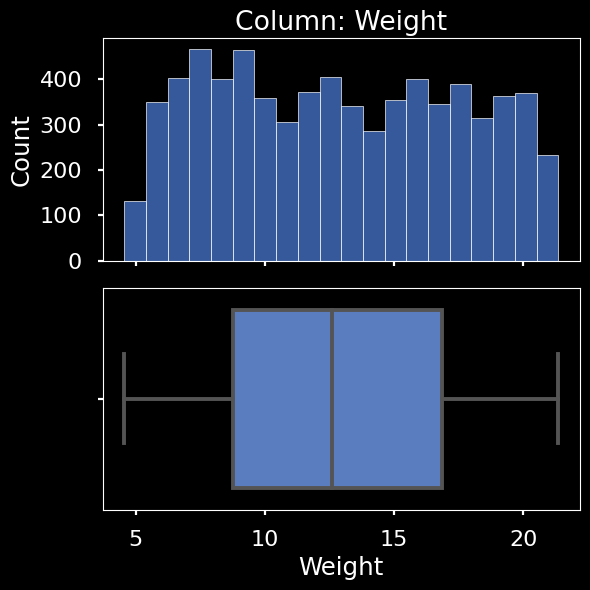

In [51]:
x = "Weight"
# Creating the figure
fig, axes = plt.subplots(nrows=2,  figsize=(6,6), sharex=True)
# Histogram on Top
sns.histplot(data=df_sales, x=x, ax=axes[0])
# Boxplot on Bottom
sns.boxplot(data=df_sales, x=x, ax=axes[1])
axes[0].set_title(f"Column: {x}")
fig.tight_layout()

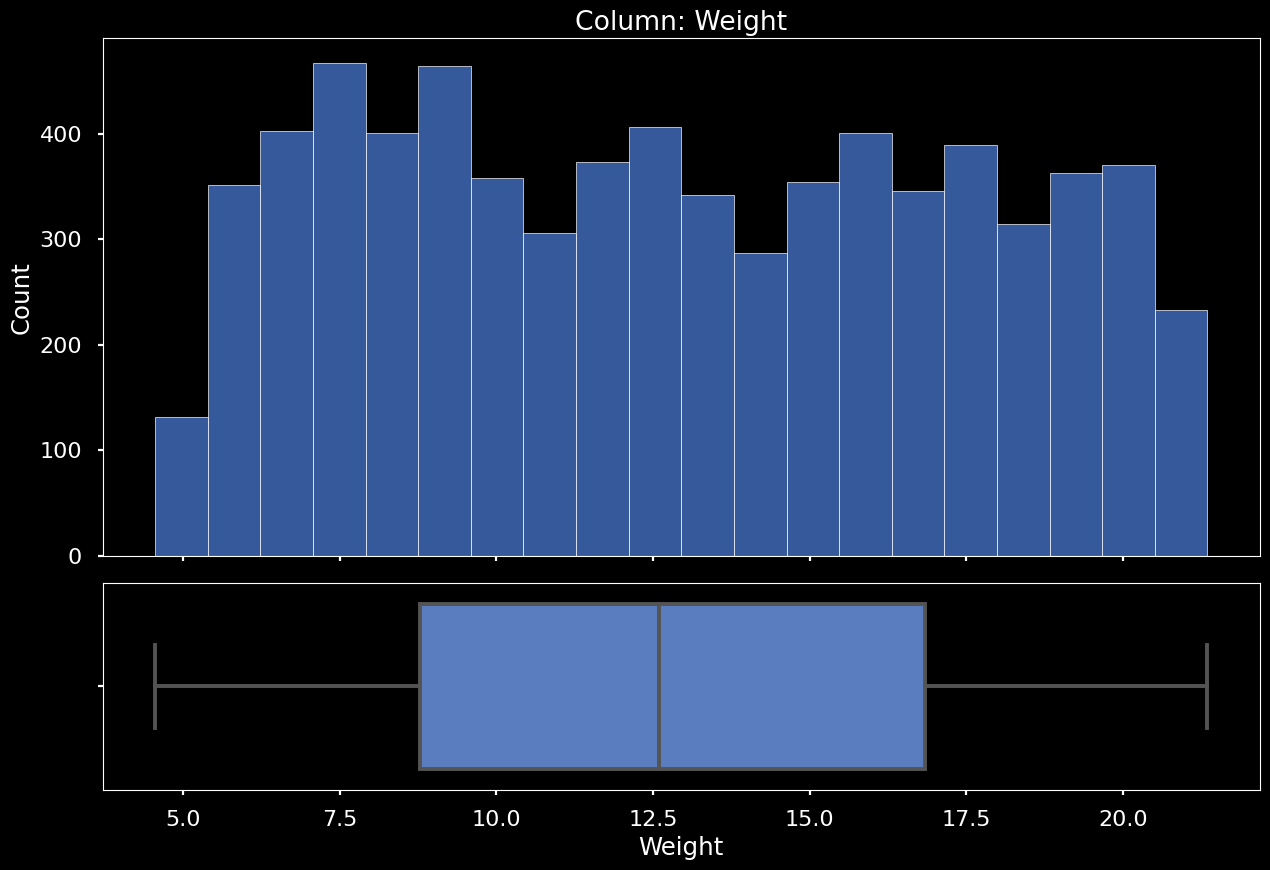

In [52]:
# Customizing subplot heights
gridspec = {"height_ratios":[0.5,0.2]}
fig, axes = plt.subplots(nrows=2,  gridspec_kw=gridspec, sharex=True)
# Histogram on Top
sns.histplot(data=df_sales, x=x, ax=axes[0])
# Boxplot on Bottom
sns.boxplot(data=df_sales, x=x, ax=axes[1])
axes[0].set_title(f"Column: {x}")
fig.tight_layout()

In [53]:
null_count = df_sales[x].isna().sum()
null_perc = null_count/len(df_sales)* 100
print(null_count)
print(null_perc)

1463
17.165317376510618


###  Custom function for numeric features

In [54]:
def explore_numeric(df, x, figsize=(6,5) ):
  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df_sales, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df_sales, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}")
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")

*  This is nominal data.
 -  We will view it's details

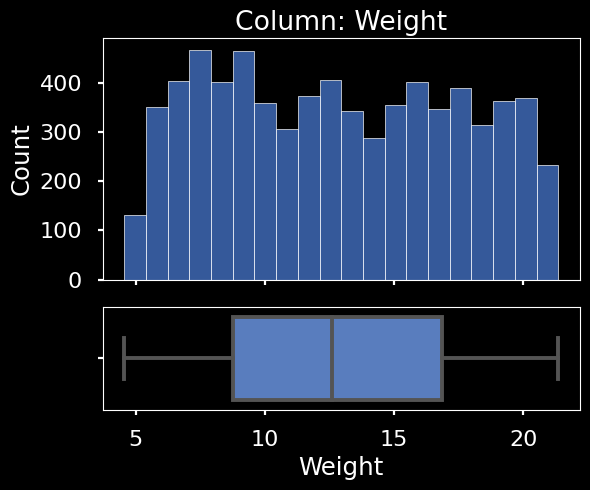

- NaN's Found: 1463 (17.17%)


In [55]:
explore_numeric(df_sales, feature);

In [56]:
# Declaring required variables
x = 'Weight'
y = "Total Sales by Outlet"
# calculating correlation
corr = df_sales[[x,y]].corr().round(2)
corr

Weight  Total Sales by Outlet
Weight                   1.00                   0.01
Total Sales by Outlet    0.01                   1.00

In [57]:
# To get the value for x vs y correlation:
r = corr.loc[x,y]
r

0.01

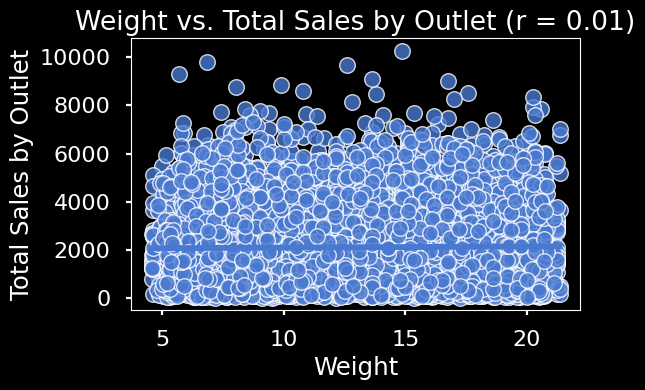

In [58]:
# Plot the data
fig, ax = plt.subplots(figsize=(6,4))
scatter_kws={'ec':'white','lw':1,'alpha':0.8}
sns.regplot(data=df_sales, x=x, y=y, ax=ax, scatter_kws=scatter_kws)
# Add the title with the correlation
ax.set_title(f"{x} vs. {y} (r = {r})")
fig.tight_layout()

###  Define a custom fuction for comparing Numeric Features to the Target Feature
-  We can add keyword arguements to make the Feature Easier to customize

In [59]:
# Add **kwargs as keyword when defining function
# Include **kwargs in the sns.regplot() within the function
def plot_numeric_vs_target(df_sales, x, y='Total Sales by Outlet', figsize=(6,4), **kwargs):
  # kwargs for sns.regplot
  # Calculate the correlation
  corr = df_sales[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df_sales, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs) # Included the new argument within the sns.regplot function
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})")
  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax

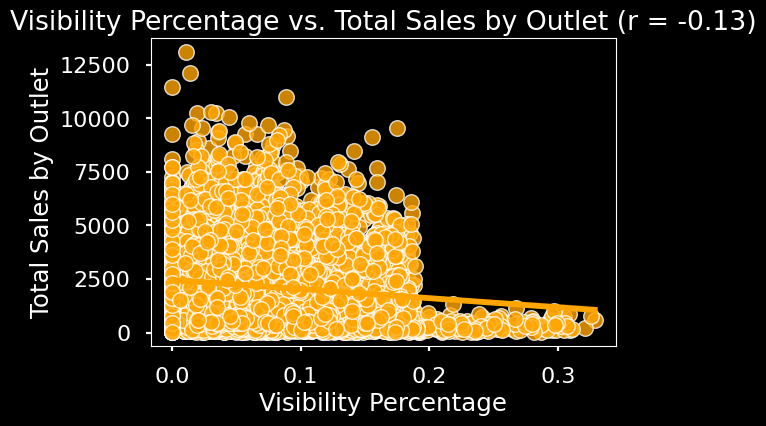

In [60]:
# Test the function with a kwarg from the regplot function
fig, ax = plot_numeric_vs_target(df_sales, "Visibility Percentage", color = "orange")

###  Create a custom function to explore catagorical features

In [61]:
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df_sales.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

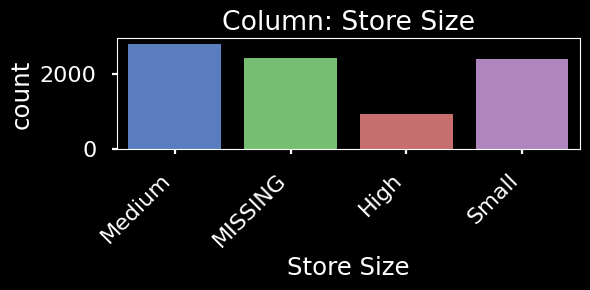

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


(<Figure size 600x300 with 1 Axes>,
 <Axes: title={'center': 'Column: Store Size'}, xlabel='Store Size', ylabel='count'>)

In [62]:
explore_categorical(df_sales, "Store Size", figsize = (6, 3))

>We see that:
1. This is an Ordinal Feature
2. It has 2410 null values(28.20%)
 -  We Will do Additional EDA to determine hou to handle the null values
3. It is not constant or quai -constant
1. It has low cardinality
4. We will know this feature before the target is determined
5. This data will be included in our business case

 ####  Additional EDA for null values in *Store Size*

  *  We will create a filter to view the rows with missing data

In [63]:
# Create a filter to view the rows with missing data
missing_rows = df_sales['Store Size'].isna()
missing_rows

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Store Size, Length: 8523, dtype: bool

In [64]:
df_sales[missing_rows]

Product ID  Weight Fat Content  Visibility Percentage  \
3         FDX07  19.200     Regular               0.000000   
8         FDH17  16.200     Regular               0.016687   
9         FDU28  19.200     Regular               0.094450   
25        NCD06  13.000     Low Fat               0.099887   
28        FDE51   5.925     Regular               0.161467   
...         ...     ...         ...                    ...   
8502      NCH43   8.420     Low Fat               0.070712   
8508      FDW31  11.350     Regular               0.043246   
8509      FDG45   8.100     Low Fat               0.214306   
8514      FDA01  15.000     Regular               0.054489   
8519      FDS36   8.380     Regular               0.046982   

           Product Category  List Price Store ID  Store Established Year  \
3     Fruits and Vegetables    182.0950   OUT010                    1998   
8              Frozen Foods     96.9726   OUT045                    2002   
9              Frozen Foods    187.8214   OUT017                    2007   
25                Household     45.9060   OUT017                    2007   
28                    Dairy     45.5086   OUT010                    1998   
...                     ...         ...      ...                     ...   
8502              Household    216.4192   OUT045                    2002   
8508  Fruits and Vegetables    199.4742   OUT045                    2002   
8509  Fruits and Vegetables    213.9902   OUT010                    1998   
8514                 Canned     57.5904   OUT045                    2002   
8519           Baking Goods    108.1570   OUT045                    2002   

     Store Size Store Location Type         Store Type  Total Sales by Outlet  
3           NaN              Tier 3      Grocery Store               732.3800  
8           NaN              Tier 2  Supermarket Type1              1076.5986  
9           NaN              Tier 2  Supermarket Type1              4710.5350  
25          NaN              Tier 2  Supermarket Type1               838.9080  
28          NaN              Tier 3      Grocery Store               178.4344  
...         ...                 ...                ...                    ...  
8502        NaN              Tier 2  Supermarket Type1              3020.0688  
8508        NaN              Tier 2  Supermarket Type1              2587.9646  
8509        NaN              Tier 3      Grocery Store               424.7804  
8514        NaN              Tier 2  Supermarket Type1               468.7232  
8519        NaN              Tier 2  Supermarket Type1               549.2850  

[2410 rows x 12 columns]

>  **We notice that all of the missing values for *Store Size* are in the Supermarket Type 1 and Grocery Store *Store Type*.**
 -  We will plot *Store Type* and *Store Size*.

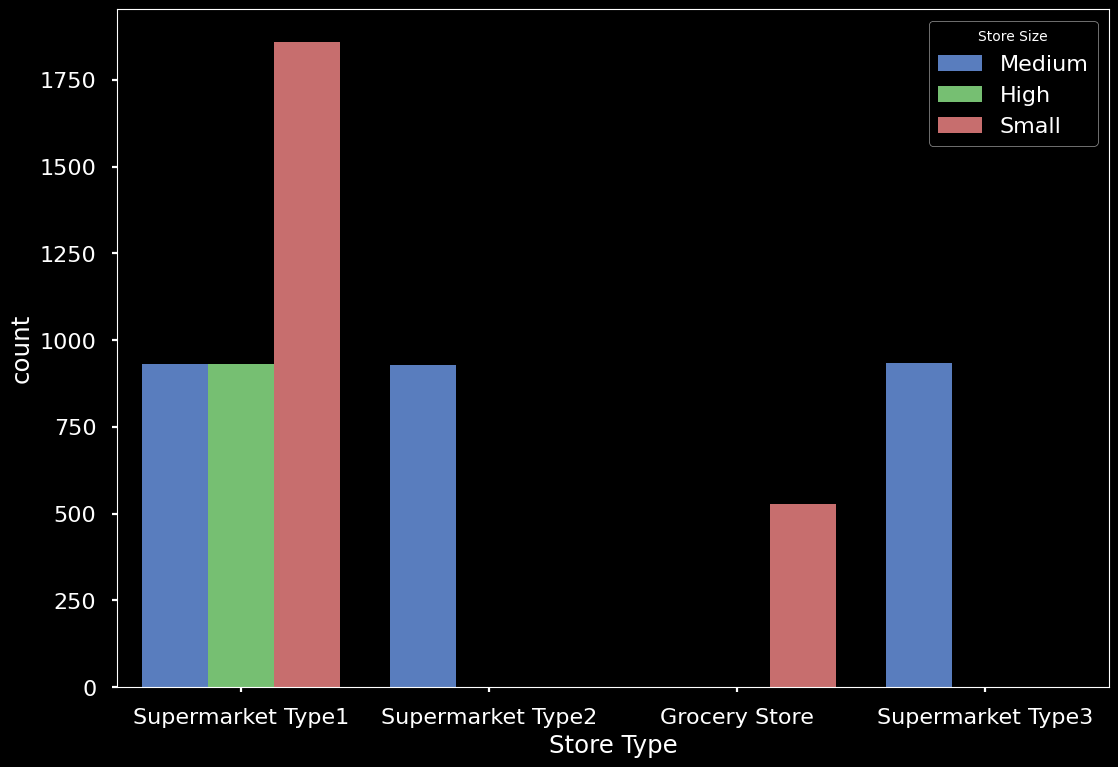

In [65]:
# Create a countplot to dtetermine relationship between Store Type and Store Size
ax = sns.countplot(data = df_sales, x = "Store Type", hue = "Store Size")

**We see that the majority of super Market Type 1 and *all* of Grocery Store values fall into the small category.**
 -  We will convert the missing values with "Small"

In [66]:
#fill in the missing rows
df_sales[missing_rows] = df_sales[missing_rows].fillna("Small")

In [67]:
# Confirm that there are no more missing values
df_sales['Store Size'].isna().sum()

0

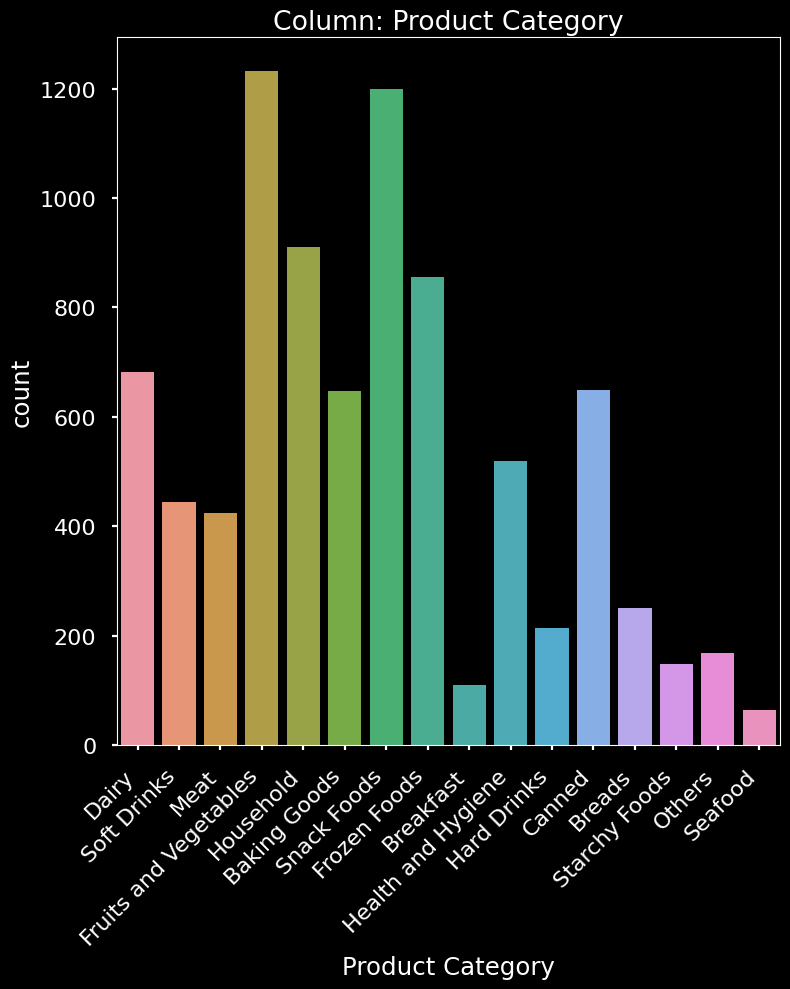

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


(<Figure size 800x1000 with 1 Axes>,
 <Axes: title={'center': 'Column: Product Category'}, xlabel='Product Category', ylabel='count'>)

In [68]:
explore_categorical(df_sales, "Product Category", figsize = (8, 10))

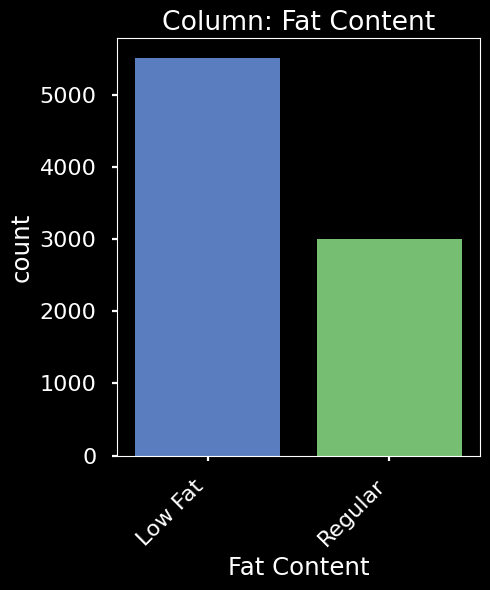

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


(<Figure size 500x600 with 1 Axes>,
 <Axes: title={'center': 'Column: Fat Content'}, xlabel='Fat Content', ylabel='count'>)

In [69]:
explore_categorical(df_sales, "Fat Content", figsize = (5,6))

###  Custom function for comparing categorical feature to Target

In [70]:
def plot_categorical_vs_target(df, x, y='Total Sales by Outlet',figsize=(6,4),
                            fillna = True, placeholder = 'Small',
                            order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df_sales.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='white', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax

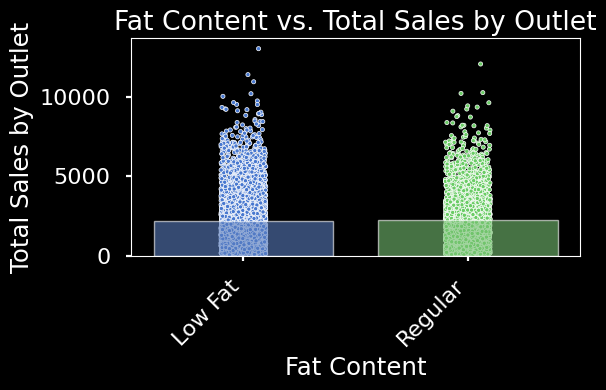

In [71]:
fig, ax = plot_categorical_vs_target(df_sales, x='Fat Content', fillna=False,)

###  We now have our custom functions defined
 -  Now we will explore each numerical and categorical feature, and compare them to our target.

-  We will view our catagorical coulmns to see which will be relevant

In [72]:
string_cols_2 = df_sales.select_dtypes("object").columns
string_cols_2

Index(['Product ID', 'Fat Content', 'Product Category', 'Store ID',
       'Store Size', 'Store Location Type', 'Store Type'],
      dtype='object')

-  We will explore "Fat Content", "Product Category", "Store Size", "Store Location Type", and "Store Type".

####  Fat Content
**Whether the product is low-fat or regular**

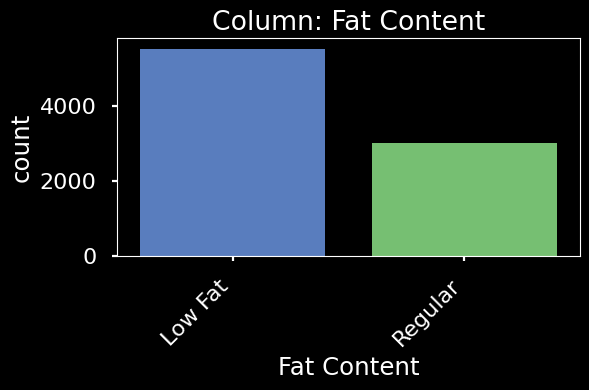

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Fat Content'}, xlabel='Fat Content', ylabel='count'>)

In [73]:
explore_categorical(df_sales, x = "Fat Content")



> We see that:

1.   This is a Categorical Feature
2.   It has no null values

3.  It is not constant or quai -constant
1.  Its has low cardinality
4.  We will know this feature before the target is determined

1.  This data will be included in our business case










(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Fat Content vs. Total Sales by Outlet'}, xlabel='Fat Content', ylabel='Total Sales by Outlet'>)

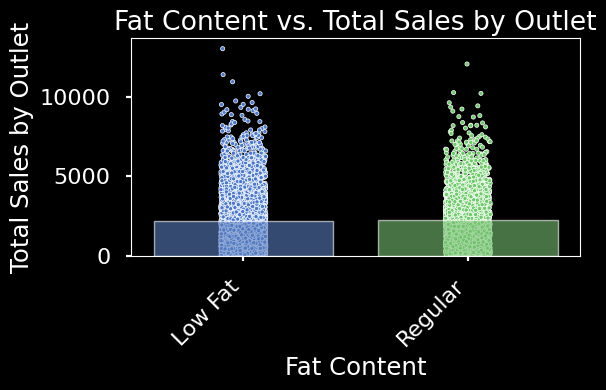

In [74]:
plot_categorical_vs_target(df_sales, x = "Fat Content")

**This feature does not appear to be a predictor of the target**

#### Product Category
**The category to which the product belongs**

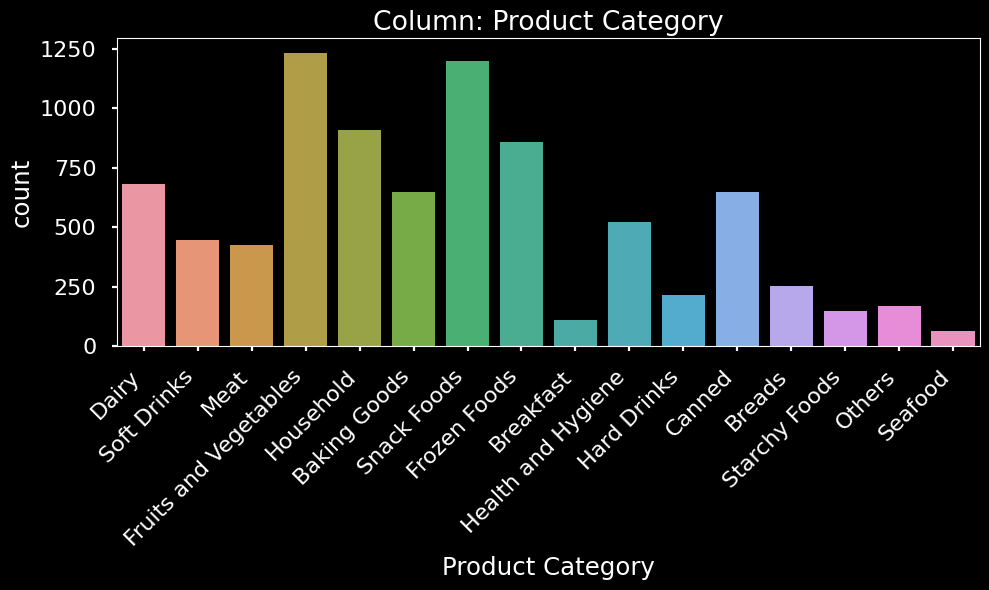

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Column: Product Category'}, xlabel='Product Category', ylabel='count'>)

In [75]:
explore_categorical(df_sales, x = 'Product Category', figsize = (10,6))

> We see that:

1. This is a Categorical Feature
2. It has no null values
3. It is not constant or quai -constant
1. It has high cardinality
4. We will know this feature before the target is determined
5. This data will be included in our business case

In [76]:
plot_categorical_vs_target(df_sales, x = 'Product Category', figsize = (10,6))

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Product Category vs. Total Sales by Outlet'}, xlabel='Product Category', ylabel='Total Sales by Outlet'>)

**This feature does not appear to be a predictor of the target**

####  Store Size
**The size of the store in terms of ground area covered**

In [77]:
explore_categorical(df_sales, x = "Store Size", figsize = (8, 6))

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Small' occurs 4798 times (56.29%)
- Not constant or quasi-constant.


(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Column: Store Size'}, xlabel='Store Size', ylabel='count'>)

> We see that:

1. This is a Categorical Feature
2. It has no null values
3. It is not constant or quai -constant
1. It has hlow cardinality
4. We will know this feature before the target is determined
5. This data will be included in our business case

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Store Size vs. Total Sales by Outlet'}, xlabel='Store Size', ylabel='Total Sales by Outlet'>)

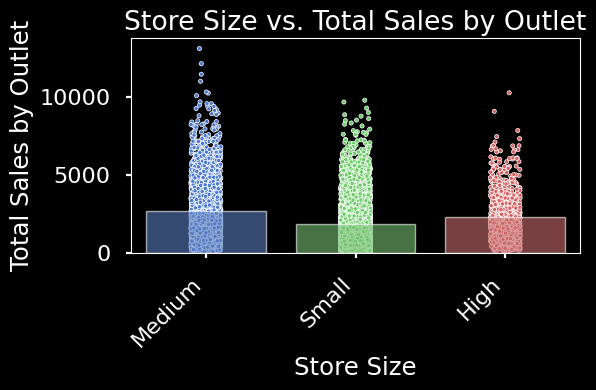

In [78]:
plot_categorical_vs_target(df_sales, x = 'Store Size')

**This feature does not appear to be a predictor of the target**

#### Store Type
**Whether the outlet is a grocery store or some sort of supermarket**

In [79]:
explore_categorical(df_sales, x = 'Store Type', figsize = (8, 6))

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Column: Store Type'}, xlabel='Store Type', ylabel='count'>)

> We see that:
1. This is a Categorical Feature
1. It has no null values
1. It is not constant or quai -constant
1. It has low cardinality
1. We will know this feature before the target is determined
1. This data will be included in our business case

In [80]:
plot_categorical_vs_target(df_sales, "Store Type")

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Store Type vs. Total Sales by Outlet'}, xlabel='Store Type', ylabel='Total Sales by Outlet'>)

-  **This feature appears to be a predictor of the target**

####  Store Location Type
**The type of area in which the store is located**




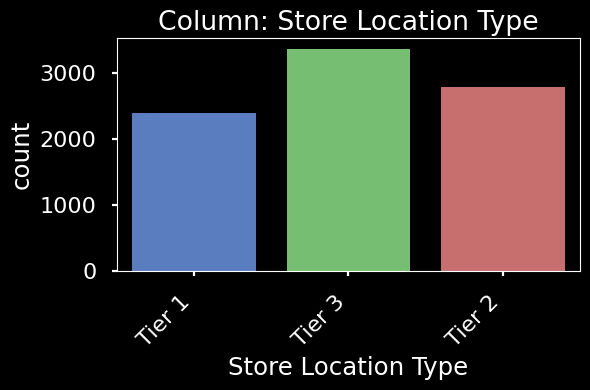

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Store Location Type'}, xlabel='Store Location Type', ylabel='count'>)

In [81]:
explore_categorical(df_sales, x = 'Store Location Type' )

> We see that:
1. This is a Categorical Feature
1. It has no null values
1. It is not constant or quai -constant
1. It has low cardinality
1. We will know this feature before the target is determined
1. This data will be included in our business case

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Store Location Type vs. Total Sales by Outlet'}, xlabel='Store Location Type', ylabel='Total Sales by Outlet'>)

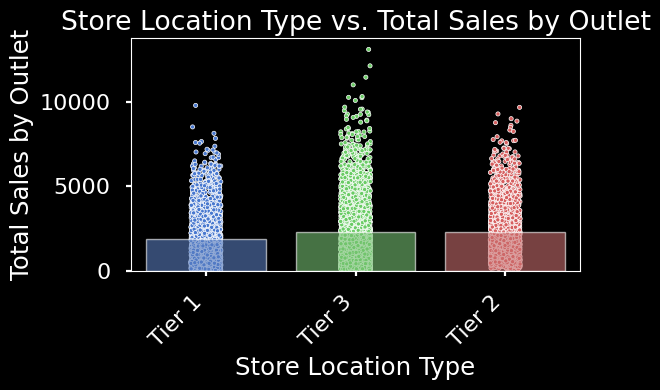

In [82]:
plot_categorical_vs_target(df_sales, x = 'Store Location Type')

**This feature does not appear to be a predictor of the target**

In [83]:
###  Now for the numerical features

- Let's view our numerical columns, they were changed changed so we will create a new filter

In [84]:
# New filter to view numerical columns
num_cols_2 = df_sales.select_dtypes("number").columns
num_cols_2

Index(['Weight', 'Visibility Percentage', 'List Price',
       'Store Established Year', 'Total Sales by Outlet'],
      dtype='object')

####  Total Sales by Outlet
**Sales of the product in the particular store. This is the target variable to be predicted.**

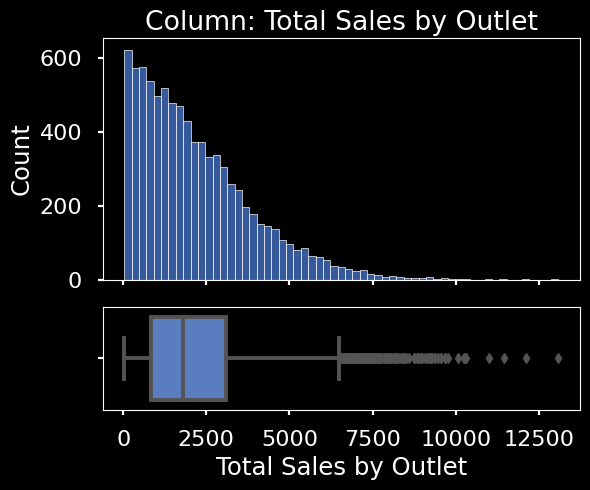

- NaN's Found: 0 (0.0%)


In [85]:
explore_numeric(df_sales, x = 'Total Sales by Outlet')

####  Weight
**Weight of product**

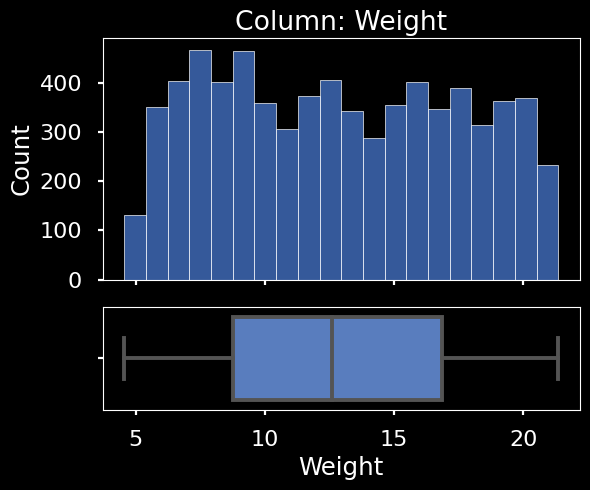

- NaN's Found: 1463 (17.17%)


In [86]:
explore_numeric(df_sales, x = "Weight")

> We see that:
1. This is a numeric column
1. it has 1463 (17.17%) null values
 -  We will determine impute the null values with either the median or mean
1. It has high cardinality
1. We Will know this feature before target is determined
1. we will include this data in our business case

In [87]:
print(df_sales['Weight'].mean())
print(df_sales['Weight'].median())

12.857645184135976
12.6


-  We will impute the null values with the median value

In [88]:
median_value = df_sales['Weight'].median()
df_sales['Weight'] = df_sales['Weight'].fillna(median_value)
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Product ID              8523 non-null   object 
 1   Weight                  8523 non-null   float64
 2   Fat Content             8523 non-null   object 
 3   Visibility Percentage   8523 non-null   float64
 4   Product Category        8523 non-null   object 
 5   List Price              8523 non-null   float64
 6   Store ID                8523 non-null   object 
 7   Store Established Year  8523 non-null   int64  
 8   Store Size              8523 non-null   object 
 9   Store Location Type     8523 non-null   object 
 10  Store Type              8523 non-null   object 
 11  Total Sales by Outlet   8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


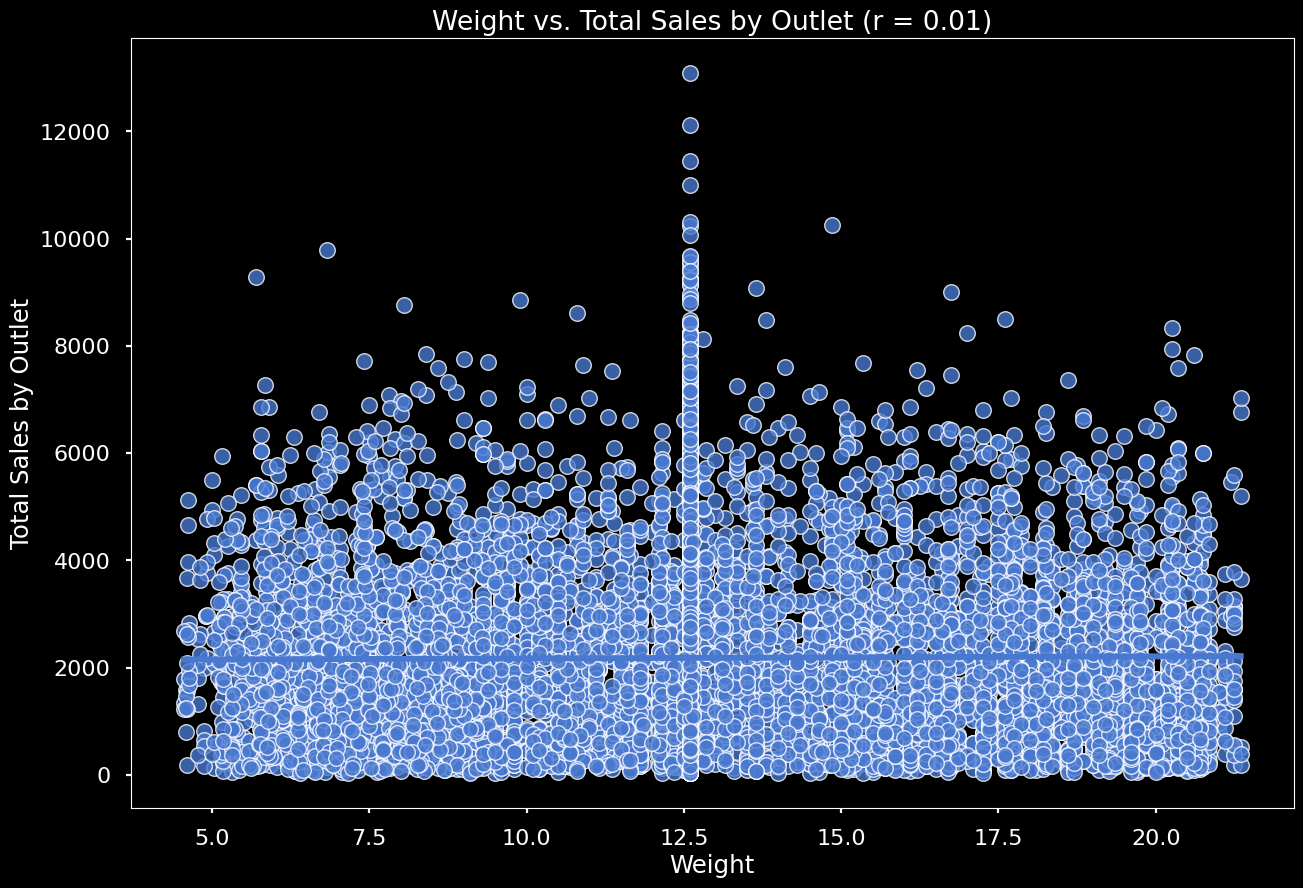

(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Weight vs. Total Sales by Outlet (r = 0.01)'}, xlabel='Weight', ylabel='Total Sales by Outlet'>)

In [89]:
plot_numeric_vs_target(df_sales, x = "Weight", figsize = (15, 10))

**This feature does not appear to be a predictor of the target**

####  Visibility Percentage
**The percentage of total display area of all products in a store allocated to the particular product**

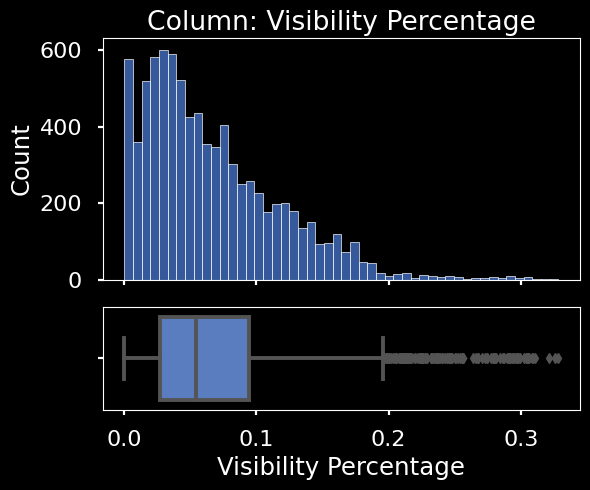

- NaN's Found: 0 (0.0%)


In [90]:
explore_numeric(df_sales, x = "Visibility Percentage")

> We see that:
1. This is a numeric column
1. it has no null values
1. It has high cardinality
1. We Will know this feature before target is determined
1. we will include this data in our business case

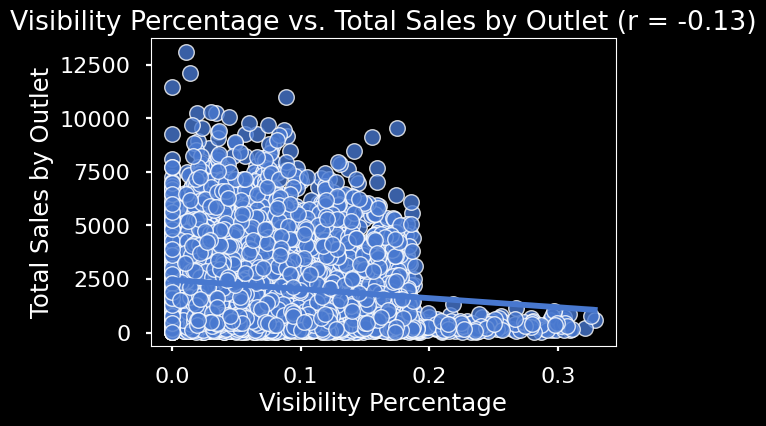

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Visibility Percentage vs. Total Sales by Outlet (r = -0.13)'}, xlabel='Visibility Percentage', ylabel='Total Sales by Outlet'>)

In [91]:
plot_numeric_vs_target(df_sales, x = "Visibility Percentage")

-  **This feature appears to be a predictor of the target**

####  List Price
**Maximum Retail Price (list price) of the product**

In [92]:
explore_numeric(df_sales, x = "List Price")

- NaN's Found: 0 (0.0%)


> We see that:
1. This is a numeric column
1. it has no null values
1. It has high cardinality
1. We Will know this feature before tharget is determined
1. we will include this data in our business case

In [93]:
plot_numeric_vs_target(df_sales, x = "List Price")

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'List Price vs. Total Sales by Outlet (r = 0.57)'}, xlabel='List Price', ylabel='Total Sales by Outlet'>)

-  **This feature appears to be a predictor of the target**

####  Store Established Year
**The year in which store was established**

In [94]:
explore_numeric(df_sales, x = "Store Established Year")

- NaN's Found: 0 (0.0%)


> We see that:
1. This is n ordinal column
1. it has no null values
1. It has low cardinality
1. We Will know this feature before tharget is determined
1. we will include this data in our business case

In [95]:
plot_numeric_vs_target(df_sales, x = "Store Established Year")

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Store Established Year vs. Total Sales by Outlet (r = -0.05)'}, xlabel='Store Established Year', ylabel='Total Sales by Outlet'>)

-  **This feature appears to be a predictor of the target**

####  Product ID

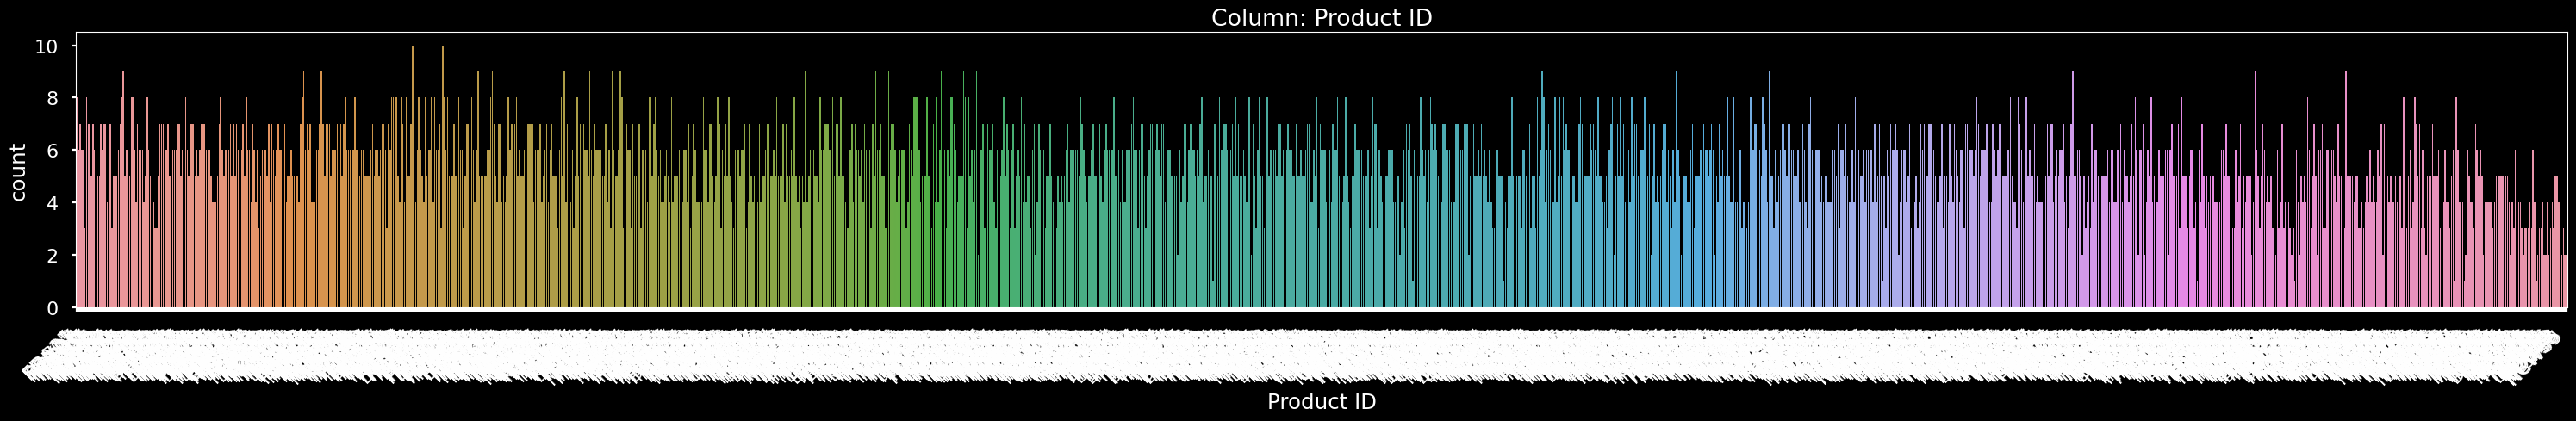

- NaN's Found: 0 (0.0%)
- Unique Values: 1559
- Most common value: 'FDW13' occurs 10 times (0.12%)
- Not constant or quasi-constant.


(<Figure size 3000x500 with 1 Axes>,
 <Axes: title={'center': 'Column: Product ID'}, xlabel='Product ID', ylabel='count'>)

In [96]:
explore_categorical(df_sales, x = "Product ID", figsize = (30, 5))

> We see that:
1. This is a catigorical feature.
1. There are no null values
1. This Fetaure has high cardinality (1559 unique values)
1. It is not constant or quasi-constant.
1. this feature does not appear to be a predictor of the Target.
1. We will know this feature before the target.
1. We will not include this in our business case

####  Store ID

In [97]:
explore_categorical(df_sales, x = "Store ID", figsize = (8,6))

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Column: Store ID'}, xlabel='Store ID', ylabel='count'>)

> We see that:
1. This is a catigorical feature.
1. There are no null values
1. This Fetaure has high cardinality (10 unique values)
1. It is not constant or quasi-constant.
1. this feature does not appear to be a predictor of the Target.
1. We will know this feature before the target.
1. We will not include this in our business case

####  We Have chosen to leave the columns "Product ID", and "Store ID" out of our business case as each has no marketing value.